In [2]:
import pyspark
import dxpy
import dxdata
from pyspark.sql.functions import col, array_contains

dispensed_database = dxpy.find_one_data_object(
    classname='database', 
    name='app*', 
    folder='/', 
    name_mode='glob', 
    describe=True)
dispensed_database_name = dispensed_database['describe']['name']

dispensed_dataset = dxpy.find_one_data_object(
    typename='Dataset', 
    name='app*.dataset', 
    folder='/', 
    name_mode='glob')
dispensed_dataset_id = dispensed_dataset['id']

In [2]:
sc = pyspark.SparkContext()
spark = pyspark.sql.SparkSession(sc)

In [3]:
dataset = dxdata.load_dataset(id=dispensed_dataset_id)

In [4]:
participant = dataset['participant']

In [5]:
cohort = dxdata.load_cohort("Metabolomics_Available")

In [6]:
# Returns all field objects for a given UKB showcase field id

def fields_for_id(field_id):
    from distutils.version import LooseVersion
    field_id = str(field_id)
    fields = participant.find_fields(name_regex=r'^p{}(_i\d+)?(_a\d+)?$'.format(field_id))
    return sorted(fields, key=lambda f: LooseVersion(f.name))

# Returns all field names for a given UKB showcase field id

def field_names_for_id(field_id):
    return [f.name for f in fields_for_id(field_id)]

In [37]:
# field_ids = ['eid','20002','20004','41202','41204','40001','40002','41203','41205','41200','41210','6153','6177','6150','2443','2986','42001','20116','53','21022','31','21000','4080','4079','12144','21002','26212']
# field_ids = ['eid','6153','6177','6150','2443','2986','42001','20116','53','21022','31','21000','4080','4079','12144','21002','26212']
# field_ids = ['eid','53','31','21022','26212']
# field_ids = ['eid','191']
field_ids = ['eid','53', '40000']
# dates_AF = ['41280','40000','41281','41282']
# metab_fields = ['20280','23400','23401','23402','23403','23404','23405','23406','23407','23408','23409','23410','23411','23412','23413','23414','23415','23416','23417','23418','23419','23420','23421','23422','23423','23424','23425','23426','23427','23428','23429','23430','23431','23432','23433','23434','23435','23436','23437','23438','23439','23440','23442','23443','23444','23445','23446','23447','23448','23449','23450','23460','23461','23462','23463','23464','23465','23466','23467','23468','23469','23470','23471','23472','23473','23474','23475','23476','23477','23478','23479','23480','23481','23482','23483','23484','23485','23486','23487','23488','23489','23490','23491','23492','23493','23494','23495','23496','23497','23498','23499','23500','23501','23502','23503','23504','23505','23506','23507','23508','23509','23510','23511','23512','23513','23514','23515','23516','23517','23518','23519','23520','23521','23522','23523','23524','23525','23526','23527','23528','23529','23530','23531','23532','23533','23534','23535','23536','23537','23538','23539','23540','23541','23542','23543','23544','23545','23546','23547','23548','23549','23550','23551','23552','23553','23554','23555','23556','23557','23558','23559','23560','23561','23562','23563','23564','23565','23566','23567','23568','23569','23570','23571','23572','23573','23574','23575','23576','23577','23578']
# sum flattens list of lists
field_names = sum([field_names_for_id(field_id) for field_id in field_ids], [])
field_names.insert(0,'eid')

/tmp/ipykernel_165/339987039.py:7: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return sorted(fields, key=lambda f: LooseVersion(f.name))


In [ ]:
metab_extra = []
metab_wanted = []
for m in metab_fields:
    metab_extra.append(field_names_for_id(m))
for i in range(len(metab_extra)):
    metab_wanted.append(metab_extra[i][0])

In [ ]:
field_names.extend(metab_wanted)
field_names.insert(0,'eid')

In [8]:
import pickle
# with open('death.pkl', 'wb') as fp:
#     pickle.dump(death,fp)

In [9]:
with open('prevAF_all.pkl', 'rb') as f:
    prevAF = pickle.load(f)
with open('race.pkl', 'rb') as f:
    race = pickle.load(f)
with open('height.pkl', 'rb') as f:
    height = pickle.load(f)
with open('weight.pkl', 'rb') as f:
    weight = pickle.load(f)
with open('sbp.pkl', 'rb') as f:
    sbp = pickle.load(f)
with open('dbp.pkl', 'rb') as f:
    dbp = pickle.load(f)
with open('smoking_status.pkl', 'rb') as f:
    smk = pickle.load(f)
with open('htn_ALL (2).pkl', 'rb') as f:
    htn = pickle.load(f)
with open('db_ALL (1).pkl', 'rb') as f:
    dm = pickle.load(f)
with open('hf_ALL.pkl', 'rb') as f:
    hf = pickle.load(f)
with open('mi (1).pkl', 'rb') as f:
    mi = pickle.load(f)
# with open('incidentAF_first.pkl', 'rb') as f:
#     incidentAF_first = pickle.load(f)
with open('iAF.pkl', 'rb') as f:
    incidentAF_first = pickle.load(f)
with open('death.pkl', 'rb') as f:
    death = pickle.load(f)

In [38]:
df = participant.retrieve_fields(names=field_names, filter_sql=cohort.sql, engine=dxdata.connect())

In [43]:
data = df.toPandas()

In [44]:
data.head()

,eid,p53_i0,p53_i1,p53_i2,p53_i3,p40000_i0,p40000_i1
0,1000114,2010-02-24,None,None,None,None,None
1,1000140,2008-08-14,None,None,None,None,None
2,1000206,2010-03-04,None,None,None,None,None
3,1000233,2007-10-08,None,2018-02-02,2023-08-09,None,None
4,1000268,2007-11-15,None,None,None,2013-03-26,None


In [47]:
import pandas as pd
# Calculate the time difference for the first death column
time_difference_0 = (data['p40000_i0'] - data['p53_i0']).dt.days / 365.25

# Calculate the time difference for the second death column
time_difference_1 = (data['p40000_i1'] - data['p53_i0']).dt.days / 365.25

# Create a new column based on the condition using the maximum time difference between the two death columns
data['time_difference'] = pd.concat([time_difference_0, time_difference_1], axis=1).max(axis=1)

# Create a new column based on the condition
data['death_within_5_years'] = (data['time_difference'] <= 5).astype(int)

data.head(5)

,eid,p53_i0,p53_i1,p53_i2,p53_i3,p40000_i0,p40000_i1,death_within_5_years,time_difference
0,1000114,2010-02-24,None,None,None,None,None,0,NaN
1,1000140,2008-08-14,None,None,None,None,None,0,NaN
2,1000206,2010-03-04,None,None,None,None,None,0,NaN
3,1000233,2007-10-08,None,2018-02-02,2023-08-09,None,None,0,NaN
4,1000268,2007-11-15,None,None,None,2013-03-26,None,0,5.360712


In [48]:
data['death_within_5_years'].value_counts()

0    264655
1      4551
Name: death_within_5_years, dtype: int64

In [ ]:
death_within_5_years_df = data[data['death_within_5_years'] == 1]

# Create a dictionary with patient IDs as keys and date of AF occurrence as values
iAF_5yr = dict(zip(death_within_5_years_df['eid'], death_within_5_years_df['p131350']))

In [ ]:
from datetime import datetime, timedelta
exc = df.collect()
death_5yr = dict()
for r in range(len(exc)):
    print(r)
    if((exc[r]['p40000_i0'] != None) and (exc[r]['p40000_i0'] - exc[r]['p53_i0'] <= timedelta(days=365.25*5))):
        death_5yr[exc[r]['eid']] = exc[r]['p40000_i0']
    elif((exc[r]['p40000_i1'] != None) and (exc[r]['p40000_i1'] - exc[r]['p53_i0'] <= timedelta(days=365.25*5))):
        death_5yr[exc[r]['eid']] = exc[r]['p40000_i1']

In [53]:
import pickle
with open('death_5yr.pkl', 'wb') as fp:
    pickle.dump(death_5yr,fp)

In [49]:
with open('death_5yr.pkl', 'rb') as f:
    death_5yr = pickle.load(f)

In [52]:
len(death_5yr.keys())

4551

In [ ]:
ltf = dict()
exc = df.collect()
for r in range(len(exc)):
    print(r)
    ltf[exc[r]['eid']] = 1

In [178]:
index_columns = dict()
index = 0
for c in df.columns:
    index_columns[c] = index
    index+=1

In [179]:
df = df.filter(~df['eid'].isin(list(prevAF.keys())))
df = df.dropna(how='any', subset=df.columns[index_columns['p20280_i0']:index_columns['p23578_i0']+1])
index_columns = dict()
index = 0
for c in df.columns:
    index_columns[c] = index
    index+=1
df = df.dropna(how='any', subset=df.columns[index_columns['p26212']:index_columns['p26212']+1])
df = df.drop('p53_i1')
df = df.drop('p53_i2')
df = df.drop('p53_i3')

In [180]:
# eid_list = df.select("eid").rdd.flatMap(lambda x: x).collect()
with open('eid_list.pkl', 'rb') as f:
    eid_list = pickle.load(f)

In [181]:
# with open('eid_list.pkl', 'wb') as fp:
#     pickle.dump(eid_list, fp)
len(eid_list)

248693

In [28]:
death['4191087']

datetime.date(2015, 2, 3)

In [29]:
incidentAF_first['4191087']

datetime.date(2000, 11, 23)

In [33]:
keys1 = set(incidentAF_first.keys())
keys2 = set(death.keys())

# Find the intersection (common keys) between the two sets
common_keys = keys1.intersection(keys2)

# Get the number of common keys
num_common_keys = len(common_keys)

# Print the number of common keys
print("Number of common keys:", num_common_keys)
common_keys = keys1.intersection(keys2)

# Print the common keys
# print("Common keys:", common_keys)

f = list()
for i in common_keys:
    if(death[i]>incidentAF_first[i]):
        f.append(i)
print(len(f))

Number of common keys: 5443
5116


In [182]:
new_column = dict()
for i in eid_list:
    if(i in race.keys()):
        new_column[i] = 1
    else:
        new_column[i] = 0
        
col = spark.createDataFrame(new_column.items(), ["eid", "race"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in eid_list:
    if(i in height.keys()):
        new_column[i] = height[i]
    else:
        new_column[i] = None
        
col = spark.createDataFrame(new_column.items(), ["eid", "height"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in eid_list:
    if(i in weight.keys()):
        new_column[i] = weight[i]
    else:
        new_column[i] = None
        
col = spark.createDataFrame(new_column.items(), ["eid", "weight"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in eid_list:
    if(i in sbp.keys()):
        new_column[i] = sbp[i]
    else:
        new_column[i] = None
        
col = spark.createDataFrame(new_column.items(), ["eid", "sbp"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in eid_list:
    if(i in dbp.keys()):
        new_column[i] = dbp[i]
    else:
        new_column[i] = None
        
col = spark.createDataFrame(new_column.items(), ["eid", "dbp"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in eid_list:
    if(i in smk.keys()):
        new_column[i] = 1
    else:
        new_column[i] = 0
        
col = spark.createDataFrame(new_column.items(), ["eid", "smoking"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in range(len(eid_list)):
    if(eid_list[i] in htn):
        new_column[eid_list[i]] = 1
    else:
        new_column[eid_list[i]] = 0
        
col = spark.createDataFrame(new_column.items(), ["eid", "htn"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in range(len(eid_list)):
    if(eid_list[i] in dm):
        new_column[eid_list[i]] = 1
    else:
        new_column[eid_list[i]] = 0
        
col = spark.createDataFrame(new_column.items(), ["eid", "dm"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in range(len(eid_list)):
    if(eid_list[i] in hf):
        new_column[eid_list[i]] = 1
    else:
        new_column[eid_list[i]] = 0
        
col = spark.createDataFrame(new_column.items(), ["eid", "hf"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in eid_list:
    if(i in mi.keys()):
        new_column[i] = 1
    else:
        new_column[i] = 0
        
col = spark.createDataFrame(new_column.items(), ["eid", "mi"])
df = df.join(col, on="eid", how="right")

import datetime as datetime
new_column = dict()
for i in eid_list:
    if(i in incidentAF_first.keys()):
        new_column[i] = incidentAF_first[i]
    if(i in death.keys()):
        new_column[i] = death[i]
    else:
        new_column[i] = datetime.date(year=2024,month=1,day=1)
        
col = spark.createDataFrame(new_column.items(), ["eid", "date_of_death_or_AF"])
df = df.join(col, on="eid", how="right")

new_column = dict()
for i in eid_list:
    if(i in incidentAF_first.keys()):
        new_column[i] = 1
    else:
        new_column[i] = 0

col = spark.createDataFrame(new_column.items(), ["eid", "incident AF"])
df = df.join(col, on="eid", how="right")

from pyspark.sql.functions import datediff
df = df.withColumn("time_to_death_or_AF",datediff(df['date_of_death_or_AF'],df['p53_i0']))
df = df.filter(~(col('column_name') < 0))
df = df.drop('p53_i0')
df = df.drop('date_of_death_or_AF')
index_columns = dict()
index = 0
for c in df.columns:
    index_columns[c] = index
    index+=1

In [38]:
df.count()

248693

In [195]:
df = df.dropna()

In [40]:
df.count()

235568

In [41]:
df.groupby('incident AF').count().show()

+-----------+------+
|incident AF| count|
+-----------+------+
|          0|223724|
|          1| 11844|
+-----------+------+



In [43]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sksurv.linear_model import CoxnetSurvivalAnalysis
import matplotlib.pyplot as plt

In [206]:
# from pyspark.sql.types import *
new_column = dict()
exc = df.collect()
for i in range(len(exc)):
    charge = 0.508*(exc[i]['p21022']/5) + 0.465*exc[i]['race'] + 0.248*(exc[i]['height']/10) + 0.115*(exc[i]['weight']/15) + 0.197*(exc[i]['sbp']/20) - 0.101*(exc[i]['dbp']/10) + 0.359*(exc[i]['smoking']) + 0.349*exc[i]['htn'] + 0.237*exc[i]['dm'] + 0.701*exc[i]['hf'] + 0.496*exc[i]['mi']
    charge = charge - 12.5815600
    charge = np.exp(charge)
    charge = 0.9718412736 * charge
    charge = 1-charge
    new_column[exc[i]['eid']] = float(charge)
# schema = StructType([StructField("eid", StringType(), True), StructField("charge-af", FloatType(), True)])
col = spark.createDataFrame(new_column.items(), ["eid", "charge-af"])
df = df.join(col, on="eid", how="right")

In [251]:
subset_df = df.select('charge-af','p26212','incident AF','time_to_death_or_AF')

In [252]:
data = subset_df.toPandas()
data.shape

(235568, 8)

In [253]:
cph = CoxPHFitter()
cph.fit(data, duration_col = 'time_to_death_or_AF', event_col = 'incident AF')

/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 235568 total observations, 223724 right-censored observations>

In [255]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
charge-af,78.804655,1.676591e+34,1.236520,76.381121,81.228190,1.485592e+33,1.892145e+35,0.0,63.731013,0.000000e+00,inf
p20280_i0,0.019675,1.019870e+00,0.006380,0.007170,0.032180,1.007196e+00,1.032703e+00,0.0,3.083819,2.043617e-03,8.934659
p23400_i0,0.529268,1.697689e+00,0.030945,0.468616,0.589920,1.597781e+00,1.803844e+00,0.0,17.103295,1.402468e-65,215.437358
p23401_i0,-1.104879,3.312508e-01,0.071225,-1.244478,-0.965281,2.880913e-01,3.808763e-01,0.0,-15.512496,2.855594e-54,177.870326
p23402_i0,0.880519,2.412151e+00,0.114089,0.656908,1.104129,1.928820e+00,3.016597e+00,0.0,7.717817,1.183393e-14,46.264064
p26212,0.428322,1.534679e+00,0.009935,0.408849,0.447794,1.505084e+00,1.564857e+00,0.0,43.111127,0.000000e+00,inf


In [256]:
index_columns = dict()
index = 0
for c in df.columns:
    index_columns[c] = index
    index+=1

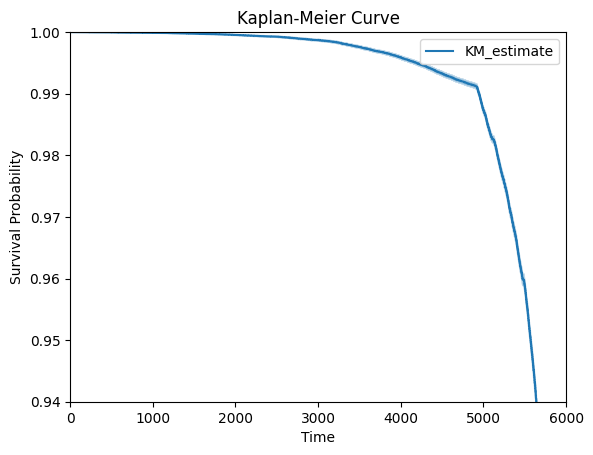

In [257]:
kmf = KaplanMeierFitter()
kmf.fit(data['time_to_death_or_AF'], event_observed=data['incident AF'])
kmf.plot(ylim=(0.94,1),xlim=(0,6000))
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curve')
plt.show()

In [78]:
import numpy as np
metabs = df.columns[index_columns['p20280_i0']:index_columns['p23578_i0']+1]
hr_dict = dict()
l95_dict = dict()
h95_dict = dict()
p_dict = dict()
for m in metabs:
    subset_df = df.select(m,'charge-af','incident AF','time_to_death_or_AF')
    data = subset_df.toPandas()
    data[m] = data[m]+1e-9
    data[m] = np.log(data[m])
    mean = data[m].mean()
    stdev = data[m].std()
    data[m] = (data[m]-mean)/stdev
    cph = CoxPHFitter()
    cph.fit(data, duration_col = 'time_to_death_or_AF', event_col = 'incident AF')
    print(m)
    hr_dict[m] = cph.summary['exp(coef)'][m]
    l95_dict[m] = cph.summary['exp(coef) lower 95%'][m]
    h95_dict[m] = cph.summary['exp(coef) upper 95%'][m]
    p_dict[m] = cph.summary['p'][m]

/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p20280_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23400_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23401_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23402_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23403_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23404_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23405_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23406_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23407_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23408_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23409_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23410_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23411_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23412_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23413_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23414_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23415_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23416_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23417_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23418_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23419_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23420_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23421_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23422_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23423_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23424_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23425_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23426_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23427_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23428_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23429_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23430_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23431_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23432_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23433_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23434_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23435_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23436_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23437_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23438_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23439_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23440_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23442_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23443_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23444_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23445_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23446_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23447_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23448_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23449_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23450_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23460_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23461_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23462_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23463_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23464_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23465_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23466_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23467_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23468_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23469_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23470_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23471_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23472_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23473_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23474_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23475_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23476_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23477_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23478_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23479_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23480_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23481_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23482_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23483_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23484_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23485_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23486_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23487_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23488_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23489_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23490_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23491_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23492_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23493_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23494_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23495_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23496_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23497_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23498_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23499_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23500_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23501_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23502_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23503_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23504_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23505_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23506_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23507_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23508_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23509_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23510_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23511_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23512_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23513_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23514_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23515_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23516_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23517_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23518_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23519_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23520_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23521_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23522_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23523_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23524_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23525_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23526_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23527_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23528_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23529_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23530_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23531_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23532_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23533_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23534_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23535_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23536_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23537_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23538_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23539_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23540_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23541_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23542_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23543_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23544_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23545_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23546_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23547_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23548_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23549_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23550_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23551_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23552_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23553_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23554_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23555_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23556_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23557_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23558_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23559_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23560_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23561_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23562_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23563_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23564_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23565_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23566_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23567_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23568_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23569_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23570_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23571_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23572_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23573_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23574_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23575_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23576_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23577_i0


/opt/conda/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) ['charge-af'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


p23578_i0


In [74]:
hr_dict

{'p20280_i0': 0.9700629871905717,
 'p23400_i0': 0.9925220680685021,
 'p23401_i0': 0.9127888263989624}

In [75]:
l95_dict

{'p20280_i0': 0.9369837300963422,
 'p23400_i0': 0.9555939969297736,
 'p23401_i0': 0.8799330754119808}

In [76]:
h95_dict

{'p20280_i0': 1.004310073794278,
 'p23400_i0': 1.0308771913260262,
 'p23401_i0': 0.9468713756539978}

In [77]:
p_dict

{'p20280_i0': 0.08597801474543117,
 'p23400_i0': 0.6980140827593164,
 'p23401_i0': 1.0676799056086677e-06}

In [54]:
# field_ids = ['eid','20002','20004','41202','41204','40001','40002','41203','41205','41200','41210','6153','6177','6150','2443','2986','42001','20116','53','21022','31','21000','4080','4079','12144','21002','26212']
# field_ids = ['eid','6153','6177','6150','2443','2986','42001','20116','53','21022','31','21000','4080','4079','12144','21002','26212']
field_ids = ['eid','53','131350']
# dates_AF = ['41280','40000','41281','41282']
metab_fields = ['20280','23400','23401','23402','23403','23404','23405','23406','23407','23408','23409','23410','23411','23412','23413','23414','23415','23416','23417','23418','23419','23420','23421','23422','23423','23424','23425','23426','23427','23428','23429','23430','23431','23432','23433','23434','23435','23436','23437','23438','23439','23440','23442','23443','23444','23445','23446','23447','23448','23449','23450','23460','23461','23462','23463','23464','23465','23466','23467','23468','23469','23470','23471','23472','23473','23474','23475','23476','23477','23478','23479','23480','23481','23482','23483','23484','23485','23486','23487','23488','23489','23490','23491','23492','23493','23494','23495','23496','23497','23498','23499','23500','23501','23502','23503','23504','23505','23506','23507','23508','23509','23510','23511','23512','23513','23514','23515','23516','23517','23518','23519','23520','23521','23522','23523','23524','23525','23526','23527','23528','23529','23530','23531','23532','23533','23534','23535','23536','23537','23538','23539','23540','23541','23542','23543','23544','23545','23546','23547','23548','23549','23550','23551','23552','23553','23554','23555','23556','23557','23558','23559','23560','23561','23562','23563','23564','23565','23566','23567','23568','23569','23570','23571','23572','23573','23574','23575','23576','23577','23578']
# sum flattens list of lists
field_names = sum([field_names_for_id(field_id) for field_id in field_ids], [])
field_names.insert(0,'eid')

/tmp/ipykernel_165/339987039.py:7: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return sorted(fields, key=lambda f: LooseVersion(f.name))


In [55]:
df = participant.retrieve_fields(names=field_names, filter_sql=cohort.sql, engine=dxdata.connect())

In [56]:
df.dtypes

[('eid', 'string'),
 ('p53_i0', 'date'),
 ('p53_i1', 'date'),
 ('p53_i2', 'date'),
 ('p53_i3', 'date'),
 ('p131350', 'date')]

In [57]:
df = df.drop('p53_i1')
df = df.drop('p53_i2')
df = df.drop('p53_i3')

In [58]:
# df = df.dropna()

In [59]:
df.count()

269206

In [60]:
df.dtypes

[('eid', 'string'), ('p53_i0', 'date'), ('p131350', 'date')]

In [61]:
data = df.toPandas()

In [62]:
data.head(5)

,eid,p53_i0,p131350
0,1000114,2010-02-24,None
1,1000140,2008-08-14,2015-06-25
2,1000206,2010-03-04,None
3,1000233,2007-10-08,None
4,1000268,2007-11-15,None


In [64]:
filtered_data = data[(data['p131350'].notna()) & (data['p131350'] < data['p53_i0'])]

# Count the number of such rows
count = len(filtered_data)
print(count)

4543


In [65]:
with open('af_prev.pkl', 'rb') as f:
    prevAF = pickle.load(f)

In [66]:
len(prevAF.keys())

4543

In [28]:
data['time_difference'] = (data['p131350'] - data['p53_i0']).dt.days / 365.25

# Create a new column based on the condition
data['af_within_5_years'] = (data['time_difference'] <= 5).astype(int)

# Optionally, you can drop the 'time_difference' column if you don't need it anymore
data.drop(columns=['time_difference'], inplace=True)

# Display the DataFrame
data.head(5)

,eid,p53_i0,p131350,af_within_5_years
0,1000114,2010-02-24,None,0
1,1000140,2008-08-14,2015-06-25,0
2,1000206,2010-03-04,None,0
3,1000233,2007-10-08,None,0
4,1000268,2007-11-15,None,0


In [29]:
data['af_within_5_years'].value_counts()

0    260062
1      9144
Name: af_within_5_years, dtype: int64

In [33]:
af_within_5_years_df = data[data['af_within_5_years'] == 1]

# Create a dictionary with patient IDs as keys and date of AF occurrence as values
iAF_5yr = dict(zip(af_within_5_years_df['eid'], af_within_5_years_df['p131350']))

In [35]:
len(iAF_5yr.keys())

9144

In [209]:
import datetime
iAF = dict()
exc = df.collect()
for r in range(len(exc)):
    if(exc[r]['p131350'] != None):
        if((exc[r]['p131350']>exc[r]['p53_i0'])&(exc[r]['p131350'] != datetime.datetime(2037,7,7))):
            iAF[exc[r]['eid']] = exc[r]['p131350']
    if(exc[r]['eid'] in incidentAF_first.keys()):
        if(incidentAF_first[exc[r]['eid']] > exc[r]['p53_i0']):
            iAF[exc[r]['eid']] = incidentAF_first[exc[r]['eid']]

In [22]:
import datetime
iAF_5yr = dict()
exc = df.collect()
for r in range(len(exc)):
    if(exc[r]['p131350'] != None):
        if((exc[r]['p131350']-exc[r]['p53_i0']<= timedelta(days=365*5))&(exc[r]['p131350']-exc[r]['p53_i0']>timedelta(0))):
            iAF_5yr[exc[r]['eid']] = exc[r]['p131350']

In [23]:
len(iAF_5yr.keys())

4595

In [26]:
rec_dict = dict()
exc = df.collect()
for r in range(len(exc)):
    rec_dict[exc[r]['eid']] = exc[r]['p53_i0']

In [28]:
import pickle
with open('rec_dict.pkl', 'wb') as fp:
    pickle.dump(rec_dict,fp)

In [36]:
import pickle
with open('iAF_5yr.pkl', 'wb') as fp:
    pickle.dump(iAF_5yr,fp)

In [213]:
for k in iAF.keys():
    if k not in incidentAF_first.keys():
        incidentAF_first[k] = iAF[k]

In [214]:
len(incidentAF_first.keys())

22754

In [215]:
with open('iAF.pkl', 'wb') as fp:
    pickle.dump(incidentAF_first,fp)

In [184]:
len(prevAF.keys())

9905

In [264]:
index_columns = dict()
index = 0
for c in df.columns:
    index_columns[c] = index
    index+=1

In [207]:
x = df.select('p26212','charge-af')
y = df.select('incident AF','time_to_death_or_AF')
x = x.toPandas()
y = y.toPandas()

In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = np.array(list(zip(y_train['incident AF'], y_train['time_to_death_or_AF'])), dtype=[('incident AF', bool), ('time', int)])
y_test = np.array(list(zip(y_test['incident AF'], y_test['time_to_death_or_AF'])), dtype=[('incident AF', bool), ('time', int)])

In [54]:
import pandas as pd
# print(len(x_train))
# print(len(x_test))
# train = pd.merge(x_train, y_train, on='eid', how='inner')
print(x_train.shape)
print(y_train.shape)
# print(train.shape)

(188454, 2)
(188454, 2)


In [62]:
y_train['incident AF'].value_counts()

0    179002
1      9452
Name: incident AF, dtype: int64

In [63]:
y_test['incident AF'].value_counts()

0    44722
1     2392
Name: incident AF, dtype: int64

In [105]:
import numpy as np
alphas = np.logspace(-4, 2, 10)  # Example range for alpha
# l1_ratios = [0, 0.1, 0.5, 1]  # Example range for l1_ratio
l1_ratios = 0.1
coxnet = CoxnetSurvivalAnalysis(alphas=alphas, l1_ratio=l1_ratios)

In [ ]:
from lifelines.utils import k_fold_cross_validation
results = k_fold_cross_validation(coxnet, x_train, scoring_method="concordance_index", k=10)

In [210]:
coxnet.fit(x_train,y_train)

CoxnetSurvivalAnalysis(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                       l1_ratio=0.1)

In [211]:
coxnet.score(x_test,y_test)

0.7706890843873728

In [ ]:
x_train['charge-af'][0:10]